In [34]:
import numpy as np
import pandas as pd

In [35]:
from cryptocmd import CmcScraper
import talib

start_date = "31-03-2020"
end_date = "31-03-2022"
symbol = "BTC"

In [36]:
df = CmcScraper(symbol, start_date=start_date, end_date=end_date).get_dataframe().set_index("Date").sort_index(0)
df = df.reset_index()
df["Percent Change"] = df["Close"] / df["Open"]
df["Moving"] = np.where(df["Percent Change"] > 1, 1, 0)
df["Varince"] = df["High"] - df["Low"]
df["RSI"] = talib.RSI(df["Close"])
df["OBV"] = talib.OBV(df["Close"], df["Volume"])
df["A/D Line"] = talib.AD(df["High"], df["Low"], df["Close"], df["Volume"])
df["MACD"], df["MACD-signal"], df["MACD-hist"] = talib.MACD(df["Close"])
# df["1-day Close"] = df.shift(-1)["Close"]
df["2-day Close"] = df.shift(-2)["Close"]


indicator_list = [
    "Close", "Open", "High", "Low", "Volume", "Market Cap",
    "Percent Change", "Moving", "Varince", "RSI", "OBV", 
    "A/D Line", "MACD", "MACD-signal", "MACD-hist"]
target_list = ["2-day Close",]

/var/folders/jn/5rwzylmj2kz6wnd9vy4t2lhh0000gn/T/ipykernel_45173/881972404.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  df = CmcScraper(symbol, start_date=start_date, end_date=end_date).get_dataframe().set_index("Date").sort_index(0)


In [37]:
df.dropna(inplace=True)
df = df.reset_index().drop('index', axis=1)
date = pd.to_datetime(df.pop('Date'))

In [38]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,696.0,3.446313e+04,1.786242e+04,8.610386e+03,1.296155e+04,3.807969e+04,4.844362e+04,6.754974e+04
High,696.0,3.538610e+04,1.832312e+04,8.949898e+03,1.317882e+04,3.935861e+04,4.946156e+04,6.878963e+04
Low,696.0,3.344820e+04,1.731159e+04,8.374323e+03,1.280495e+04,3.653631e+04,4.702902e+04,6.638206e+04
Close,696.0,3.451207e+04,1.783645e+04,8.601796e+03,1.301485e+04,3.810011e+04,4.842453e+04,6.756683e+04
Volume,696.0,3.895825e+10,2.145777e+10,1.225260e+10,2.559018e+10,3.431238e+10,4.753257e+10,3.509679e+11
Market Cap,696.0,6.472321e+11,3.367548e+11,1.580592e+11,2.411105e+11,7.173338e+11,9.076114e+11,1.274831e+12
Percent Change,696.0,1.002959e+00,3.708122e-02,8.616244e-01,9.849583e-01,1.002599e+00,1.020828e+00,1.187972e+00
Moving,696.0,5.359195e-01,4.990668e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Varince,696.0,1.937904e+03,1.671357e+03,7.676101e+01,5.714430e+02,1.651215e+03,2.693037e+03,1.286462e+04
RSI,696.0,5.495810e+01,1.382511e+01,2.033876e+01,4.458414e+01,5.450014e+01,6.431440e+01,9.071943e+01


In [39]:
selected_feature = list(df.columns)
target = "Close"

split_portion = (0.6, 0.20)

n = len(df)
train_df = df[selected_feature][: int(n * split_portion[0])]
val_df = df[selected_feature][int(n * split_portion[0]) : -int(n * split_portion[-1])]
test_df = df[selected_feature][-int(n * split_portion[-1]) :]

num_features = df[selected_feature].shape[1]

train_df.shape, val_df.shape, test_df.shape, num_features

((417, 16), (140, 16), (139, 16), 16)

In [40]:
train_df

,Open,High,Low,Close,Volume,Market Cap,Percent Change,Moving,Varince,RSI,OBV,A/D Line,MACD,MACD-signal,MACD-hist,2-day Close
0,8983.614149,9167.781344,8830.971255,8897.468510,4.710179e+10,1.633582e+11,0.990411,0,336.810089,76.573912,1.689454e+11,2.086125e+11,511.441982,307.349551,204.092431,9003.070178
1,8895.744874,8956.906519,8645.024126,8912.654605,4.571880e+10,1.636545e+11,1.001901,1,311.882393,76.719914,2.146642e+11,2.413575e+11,528.926594,351.664959,177.261635,9268.762081
2,8912.832160,9062.414564,8856.827155,9003.070178,4.314846e+10,1.653325e+11,1.010125,1,205.587408,77.614471,2.578126e+11,2.595957e+11,543.810350,390.094037,153.716312,9951.518745
3,9007.441256,9411.467870,8966.705990,9268.762081,4.937189e+10,1.702296e+11,1.029012,1,444.761881,80.041480,3.071845e+11,2.772848e+11,570.468938,426.169018,144.299921,9842.666368
4,9261.895058,9992.663921,9138.322572,9951.518745,6.111270e+10,1.827874e+11,1.074458,1,854.341349,84.647742,3.682972e+11,3.325111e+11,639.319145,468.799043,170.520102,9593.896734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,35854.529223,36457.796280,34933.062251,35615.869270,3.120728e+10,6.674009e+11,0.993344,0,1524.734029,42.260212,1.253123e+12,3.007678e+12,-1155.135312,-1564.360161,409.224849,31676.693733
413,35563.139415,36059.483517,33432.076044,35698.296443,3.666403e+10,6.689689e+11,1.003800,1,2627.407473,42.507169,1.289787e+12,3.034262e+12,-1197.304270,-1490.948983,293.644713,32505.659824
414,35641.146065,35721.639634,31295.935529,31676.693733,5.280904e+10,5.936276e+11,0.888768,0,4425.704105,34.707405,1.236978e+12,2.990539e+12,-1537.509746,-1500.261136,-37.248610,33723.028978
415,31622.377085,33292.454764,28893.621658,32505.659824,5.896435e+10,6.091806e+11,1.027932,1,4398.833106,37.262849,1.295943e+12,3.028410e+12,-1720.402670,-1544.289442,-176.113227,34662.435894


In [41]:
class StandardScaler():
    
    def fit(self, fit_data):
        self.fit_data = fit_data
        self.fit_mean = fit_data.mean()
        self.fit_std = fit_data.std()
        
    def transform(self, data):
        return (data - self.fit_mean) / self.fit_std
    
    def inverse_transform(self, trans_data):
        return trans_data * self.fit_std + self.fit_std
    
    def fit_transform(self, fit_data):
        self.fit(fit_data)
        return self.transform(fit_data)

In [42]:
class MinMaxScaler():
    
    def __init__(self, scale_range=(0, 1)):
        self.a, self.b = scale_range
    
    def fit(self, fit_data):
        self.fit_data = fit_data
        self.fit_min = fit_data.min()
        self.fit_max = fit_data.max()
        
    def transform(self, data):
        return self.a + ((data - self.fit_min)*(self.b - self.a)) / (self.fit_max - self.fit_min)
    
    def inverse_transform(self, trans_data):
        return (trans_data - self.a) * (self.fit_max - self.fit_min) / ((trans_data - self.fit_min)*(self.b - self.a))
    
    def fit_transform(self, fit_data):
        self.fit(fit_data)
        return self.transform(fit_data)

In [43]:
# scaler = StandardScaler()
scaler = MinMaxScaler()

train_df = scaler.fit_transform(train_df)
val_df = scaler.transform(val_df)
test_df = scaler.transform(test_df)

In [44]:
train_df

,Open,High,Low,Close,Volume,Market Cap,Percent Change,Moving,Varince,RSI,OBV,A/D Line,MACD,MACD-signal,MACD-hist,2-day Close
0,0.006797,0.003897,0.008482,0.005385,0.102886,0.005153,0.394629,0.0,0.020336,0.790290,0.008851,0.000000,0.538847,0.529957,0.648387,0.007309
1,0.005197,0.000125,0.005028,0.005662,0.098803,0.005441,0.429837,1.0,0.018386,0.792455,0.029667,0.011323,0.540540,0.534905,0.639224,0.012148
2,0.005508,0.002012,0.008963,0.007309,0.091215,0.007073,0.455036,1.0,0.010074,0.805717,0.049312,0.017630,0.541981,0.539196,0.631183,0.024584
3,0.007231,0.008255,0.011004,0.012148,0.109588,0.011835,0.512911,1.0,0.028777,0.841698,0.071792,0.023747,0.544563,0.543224,0.627967,0.022602
4,0.011864,0.018650,0.014192,0.024584,0.144251,0.024047,0.652169,1.0,0.060806,0.909986,0.099616,0.042845,0.551230,0.547984,0.636922,0.018071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,0.496130,0.491975,0.493339,0.492045,0.055960,0.495322,0.403616,0.0,0.113230,0.281584,0.502478,0.967936,0.377468,0.320970,0.718441,0.420295
413,0.490823,0.484851,0.465458,0.493546,0.072071,0.496846,0.435658,1.0,0.199458,0.285246,0.519171,0.977129,0.373384,0.329167,0.678970,0.435394
414,0.492244,0.478809,0.425778,0.420295,0.119736,0.423579,0.083172,0.0,0.340084,0.169613,0.495127,0.962010,0.340441,0.328127,0.565968,0.457568
415,0.419060,0.435363,0.381154,0.435394,0.137909,0.438704,0.509603,1.0,0.337982,0.207498,0.521974,0.975106,0.322731,0.323211,0.518544,0.474679


In [45]:
train_feature_df = train_df[indicator_list]
# train_target_df = train_df[target_list]

In [46]:
train_feature_df

,Close,Open,High,Low,Volume,Market Cap,Percent Change,Moving,Varince,RSI,OBV,A/D Line,MACD,MACD-signal,MACD-hist
0,0.005385,0.006797,0.003897,0.008482,0.102886,0.005153,0.394629,0.0,0.020336,0.790290,0.008851,0.000000,0.538847,0.529957,0.648387
1,0.005662,0.005197,0.000125,0.005028,0.098803,0.005441,0.429837,1.0,0.018386,0.792455,0.029667,0.011323,0.540540,0.534905,0.639224
2,0.007309,0.005508,0.002012,0.008963,0.091215,0.007073,0.455036,1.0,0.010074,0.805717,0.049312,0.017630,0.541981,0.539196,0.631183
3,0.012148,0.007231,0.008255,0.011004,0.109588,0.011835,0.512911,1.0,0.028777,0.841698,0.071792,0.023747,0.544563,0.543224,0.627967
4,0.024584,0.011864,0.018650,0.014192,0.144251,0.024047,0.652169,1.0,0.060806,0.909986,0.099616,0.042845,0.551230,0.547984,0.636922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,0.492045,0.496130,0.491975,0.493339,0.055960,0.495322,0.403616,0.0,0.113230,0.281584,0.502478,0.967936,0.377468,0.320970,0.718441
413,0.493546,0.490823,0.484851,0.465458,0.072071,0.496846,0.435658,1.0,0.199458,0.285246,0.519171,0.977129,0.373384,0.329167,0.678970
414,0.420295,0.492244,0.478809,0.425778,0.119736,0.423579,0.083172,0.0,0.340084,0.169613,0.495127,0.962010,0.340441,0.328127,0.565968
415,0.435394,0.419060,0.435363,0.381154,0.137909,0.438704,0.509603,1.0,0.337982,0.207498,0.521974,0.975106,0.322731,0.323211,0.518544


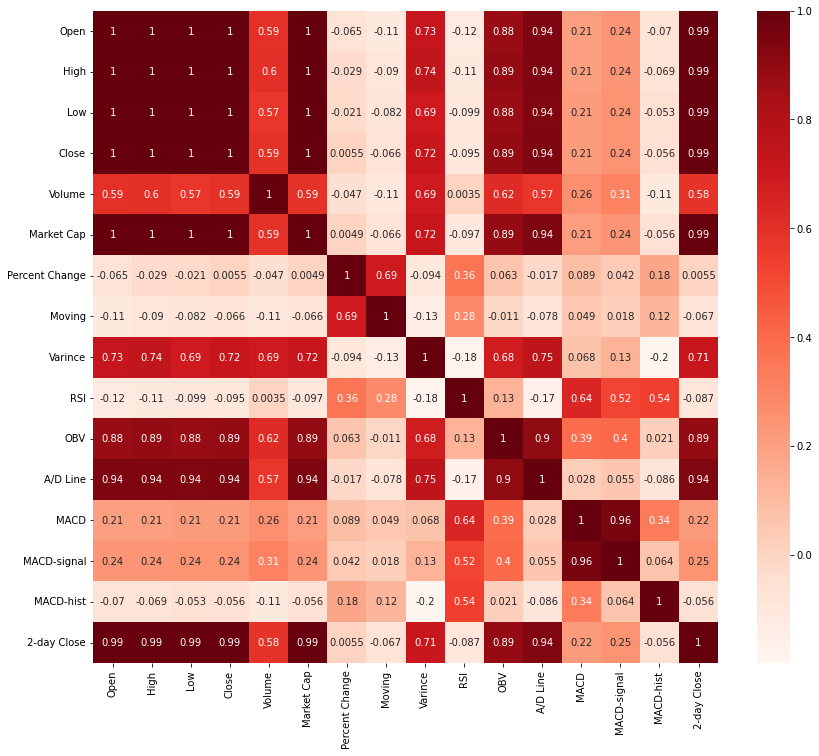

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,12))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [49]:
cor_target = abs(cor[target_list[0]])

relevant_features = cor_target[indicator_list]
relevant_features.sort_values(ascending=False)

Close             0.994376
Market Cap        0.994309
High              0.992790
Low               0.992714
Open              0.991249
A/D Line          0.937153
OBV               0.891840
Varince           0.711860
Volume            0.584723
MACD-signal       0.248540
MACD              0.218978
RSI               0.086704
Moving            0.067125
MACD-hist         0.056328
Percent Change    0.005512
Name: 2-day Close, dtype: float64